In [ ]:
import os
from google.colab import drive
import torch as tr
drive.mount('/content/drive')
DATA_DIR = '/content/drive/MyDrive/Colab Notebooks/mmpy'
os.chdir(DATA_DIR)
!ls

# if tr.cuda.is_available():
#     device = tr.device('cuda')
# elif hasattr(tr.backends, 'mps') and tr.backends.mps.is_available():
#     device = tr.device('mps')
# else:
#     device = tr.device('cpu')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
data_new.pkl  mmpy.ipynb		nn_transformer_learn  rnn_torchviz.png
data.pkl      model_classification.pth	rnn_torchviz	      set.mm


In [ ]:
!pip install metamath-py

In [ ]:
# import metamathpy as mm
from metamathpy import database
db = database.parse(os.path.join("set.mm"))

In [ ]:
import metamathpy.proof as mp
from collections import deque
import pickle

exclude_list = ['wff', 'class','setvar']

# hyp_list = []
q = deque()

# res contains all the rules with $p tag
res = {k:v for k,v in db.rules.items() if v.consequent.tag=="$p"}

data = []
# i=0

count_proofsteps_list = []



for rule in res:
  count_proofsteps=0
  root, _ = mp.verify_proof(db, res[rule])

  q.append(root)
  data.append([root.conclusion,root.rule.consequent.label])
  count_proofsteps+=1

  while q:
    new_root = q.popleft()

    for key in new_root.dependencies:
      if new_root.dependencies[key].rule.consequent.tag == '$e':
        continue
        # hyp_list.append([new_root.dependencies[key].conclusion,new_root.dependencies[key].rule.consequent.label])

      if (new_root.dependencies[key].conclusion[0] not in exclude_list):
        q.append(new_root.dependencies[key])
        data.append([new_root.dependencies[key].conclusion,new_root.dependencies[key].rule.consequent.label])
        count_proofsteps+=1
        # if len (new_root.dependencies[key].conclusion) > 100:
        #   print ([new_root.dependencies[key].conclusion,new_root.dependencies[key].rule.consequent.label])
        #   print (root.rule.consequent.label)

  count_proofsteps_list.append(count_proofsteps)



In [ ]:

with open('data_new.pkl', 'wb') as file:
  pickle.dump(data, file)

In [ ]:
import pickle
with open('data_new.pkl', 'rb') as file:
  # Call load method to deserialze
  data = pickle.load(file)
print(len(data))

2974434


In [ ]:
import random
print(random.choice(data))
print(len(data))
# print(random.choice(hyp_list))
# print(len(hyp_list))


[('|-', '(', '(', 'A', 'e.', 'RR+', '/\\', 'B', 'e.', 'NN', ')', '->', 'E.', 'x', 'e.', '(', '0', '...', 'B', ')', 'E.', 'y', 'e.', '(', '0', '...', 'B', ')', '(', 'x', '<', 'y', '/\\', '(', '|_', '`', '(', 'B', 'x.', '(', '(', 'A', 'x.', 'x', ')', 'mod', '1', ')', ')', ')', '=', '(', '|_', '`', '(', 'B', 'x.', '(', '(', 'A', 'x.', 'y', ')', 'mod', '1', ')', ')', ')', ')', ')'), 'fphpdo']
2974434


In [ ]:
from collections import Counter

data = data[:10000]
labels_list = [row[1] for row in data]
c = Counter(labels_list)
print(c)
print(len(labels_list))


Counter({'ax-mp': 424, 'bitri': 172, 'id': 166, 'syl': 144, 'a1i': 107, 'ex': 92, '3bitr4i': 88, 'impbii': 81, 'com12': 72, 'imp': 69, 'bicomi': 67, 'nfv': 67, 'bitr4i': 59, 'syl6': 57, 'simpl': 54, 'jca': 51, 'imim1': 49, 'biimpi': 49, 'simpr': 49, 'biid': 46, 'albii': 46, 'ax-5': 46, 'ax-1': 45, 'merco1': 45, '3bitri': 44, 'pm2.61i': 42, 'merco2': 42, 'exbii': 41, 'rbsyl': 37, 'syl5': 36, 'impbid': 36, 'df-or': 36, 'sylib': 35, 'adantl': 35, 'df-3an': 34, 'impsingle': 34, 'nf5i': 34, 'sp': 34, 'sylbi': 33, 'anbi2i': 33, '3ad2ant1': 33, '3ad2ant2': 33, '3ad2ant3': 33, 'pm2.21': 32, 'mpbi': 32, 'adantr': 32, 'orc': 32, 'minimp': 32, 'nfa1': 32, 'a1d': 31, 'biimpd': 31, 'orcom': 30, 'sps': 30, 'biimpri': 29, 'notbii': 29, 'anmp': 29, 'df-ex': 29, 'alimi': 29, 'mpbir': 28, 'bitr3i': 28, '3bitr4g': 28, 'bicomd': 27, 'sylibr': 27, 'ancom': 27, 'ax6ev': 27, 'nic-mp': 26, 'alnex': 26, 'notbid': 25, 'jaoi': 25, 'olc': 25, 'xchbinx': 24, 'meredith': 24, 'mpg': 24, 'nf5ri': 24, 'syld': 23, 'bic

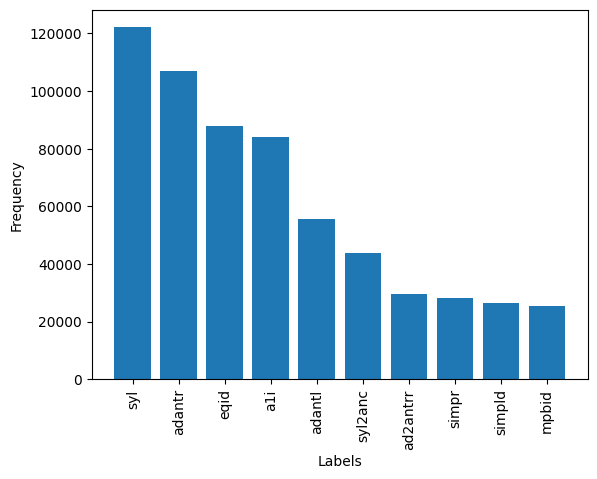

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

common = c.most_common(10)
labels = [item[0] for item in common]
number = [item[1] for item in common]
nbars = len(common)

# fig = plt.figure()
plt.bar(np.arange(nbars), number, tick_label=labels)
plt.xticks(rotation=90)

plt.xlabel("Labels")
plt.ylabel("Frequency")

plt.show()

In [ ]:
vocab_in = {k for i in data for k in i[0]}
vocab_in = dict.fromkeys(vocab_in,0)
vocab_in.update((k, i) for i, k in enumerate(vocab_in,1))
print(vocab_in)
vocab_in_size = len(vocab_in)
print(vocab_in_size)


vocab_out = {i[1] for i in data}
vocab_out = dict.fromkeys(vocab_out,0)
vocab_out.update((k, i) for i, k in enumerate(vocab_out))
print(vocab_out)
vocab_out_size = len(vocab_out)
print(vocab_out_size)

{'ps': 1, 'mu': 2, '-\\/': 3, 't': 4, 'F.': 5, 'f': 6, 'E.': 7, '->': 8, ',': 9, 'z': 10, ')': 11, 'g': 12, '-/\\': 13, 'wff': 14, 'w': 15, 'y': 16, '|-': 17, 'ka': 18, '/': 19, '/\\': 20, 'e.': 21, 'ph': 22, 'ze': 23, '<->': 24, '[': 25, 'A.': 26, '\\/': 27, 'cadd': 28, 'x': 29, '=': 30, 's': 31, 'E!': 32, 'F/': 33, 'u': 34, 'ta': 35, 'rh': 36, '(': 37, '-.': 38, 'si': 39, ']': 40, 'th': 41, 'if-': 42, 'T.': 43, 'hadd': 44, 'et': 45, 'E*': 46, 'la': 47, 'v': 48, 'ch': 49, '\\/_': 50}
50
{'imp4d': 0, 'pm2.86': 1, 'sbanALT': 2, '3adant2': 3, 'axc16i': 4, 'cbvalw': 5, 'ori': 6, 'df-tru': 7, 'nf5-1': 8, 'pm5.32': 9, 'equsalhw': 10, 'nanbi': 11, 'sbco2': 12, 'com5l': 13, 'spvv': 14, 'dral1v': 15, 'ad4antlr': 16, 'spimedv': 17, 'equsb3': 18, 'mt2': 19, 'nic-isw2': 20, 'a1ii.1': 21, 'pm4.8': 22, 'tbwlem4': 23, 'stdpc4ALT': 24, 'pm2.65d': 25, 'nfeud2': 26, 'syl321anc': 27, 'dral2': 28, 'nanbi12d': 29, 'mtt': 30, 'pm2.18': 31, '3anim123i': 32, 'com3r': 33, 'syl2anbr': 34, 'tbw-ax1': 35, 'pm4.6

In [ ]:
#count avg proofsteps

print (sum(count_proofsteps_list) / len(count_proofsteps_list))

NameError: name 'count_proofsteps_list' is not defined